In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# !pip install geopandas

In [3]:
BICYCLE = 15
SCOOTER = 21
E_BICYCLE = 23

micro_m = [SCOOTER, E_BICYCLE, BICYCLE]

## Loading i_m_h_tel_aviv_yafo

In [14]:
involved_markers_heb_ta = pd.read_csv('./csv_tables/i_m_h_tel_aviv_yafo.csv')
involved_markers_heb_ta['accident_date'] = pd.to_datetime(involved_markers_heb_ta['accident_date'])
involved_markers_heb_ta


C:\Users\itay8\AppData\Local\Temp\ipykernel_19720\4074794966.py:1: DtypeWarning: Columns (44,151) have mixed types. Specify dtype option on import or set low_memory=False.
  involved_markers_heb_ta = pd.read_csv('./csv_tables/involved_markers_heb_ta.csv')


,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date
0,2013001938,12013001938,1,1,1,נהג,1996,8,35-39,1.0,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,1.0,קל,2013-07-31 02:00:00
1,2013001938,12013001938,1,1,3,נפגע,0,5,20-24,1.0,...,0.0,NaN,1.0,ישראלי,99.0,1.0,עד 1.9,1.0,קל,2013-07-31 02:00:00
2,2013002190,12013002190,1,1,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,0.0,לא מנועי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-03-14 02:30:00
3,2013002190,12013002190,1,1,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2013-03-14 02:30:00
4,2023065778,32023065778,3,3,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,3.0,2.0,2.0-2.9,4.0,אין נזק,2023-01-05 14:15:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103058,2023093433,32023093433,3,3,2,נהג נפגע,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-02-14 08:30:00
103059,2023099292,32023099292,3,3,1,נהג,2001,9,40-44,2.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,4.0,אין נזק,2023-02-23 17:00:00
103060,2023092779,32023092779,3,3,1,נהג,0,99,לא ידוע,0.0,...,0.0,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,2023-01-24 23:15:00
103061,2023090298,32023090298,3,3,2,נהג נפגע,1995,10,45-49,2.0,...,0.0,NaN,1.0,ישראלי,3.0,1.0,עד 1.9,1.0,קל,2023-01-01 16:00:00


In [ ]:
involved_markers_heb_ta['accident_date'] = pd.to_datetime(
    involved_markers_heb_ta['accident_year'].astype(str) + '-' + 
    involved_markers_heb_ta['accident_month'].astype(str) + '-' + 
    involved_markers_heb_ta['accident_day'].astype(str) + ' ' + ``
    involved_markers_heb_ta['accident_hour'].astype(str) + ':' + 
    involved_markers_heb_ta['accident_minute'].astype(str)
)


In [ ]:
involved_markers_heb_ta.drop(columns=['vehicle_vehicle_type','vehicle_vehicle_type_hebrew'], inplace=True)

In [15]:
involved_markers_heb_ta['accident_date']

0        2013-07-31 02:00:00
1        2013-07-31 02:00:00
2        2013-03-14 02:30:00
3        2013-03-14 02:30:00
4        2023-01-05 14:15:00
                 ...        
103058   2023-02-14 08:30:00
103059   2023-02-23 17:00:00
103060   2023-01-24 23:15:00
103061   2023-01-01 16:00:00
103062   2023-03-05 20:30:00
Name: accident_date, Length: 103063, dtype: datetime64[ns]

## Loading BP

In [27]:
clean_st_names = []
bp_street_names = pd.read_csv('./csv_tables/bp_street_name_only.csv', index_col=0)
for index, row in bp_street_names.iterrows():
    if isinstance(row['street_name'], float):
        clean_st_names.append('')
    else:
        st_name = row['street_name'].split("מ-")
        clean_st_names.append(st_name[0].strip())


clean_st_names

['נמיר',
 'פרופס',
 'יאיר רוזנבלום',
 'קרן קיימת לישראל',
 'רקנאטי בגינה',
 '2426',
 'שי עגנון',
 'איינשטיין',
 'איינשטיין',
 'שי עגנון',
 'משעול 2364',
 'בני אפריים',
 'אהרון בקר',
 'אהרון בקר',
 'בני אפרים',
 'בני אפרים',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון שביל 7.10',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'רוקח',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'פארק הירקון',
 'נמל ת"א',
 'חבקוק',
 '2397',
 'הרברט סמואל',
 'נורדאו',
 'נורדאו',
 'נורדאו',
 'פנקס'

In [28]:
import geopandas as gpd

# Load the shapefile
bicycle_paths = gpd.read_file("./csv_tables/tel_avlv_bycicle_UTM/Bicycle Routes.shp")
bicycle_paths.columns = ['oid_shvil', 'msorech', 'dateimport', 'width', 'direction', 'create_year',
                         'shemmikta', 'miflas', 'create_date', 'geometry']
bicycle_paths.create_year = bicycle_paths.create_year.fillna(-1).astype(int)
bicycle_paths
# changing col names to fit other dataframes 
bicycle_paths.oid_shvil = pd.to_numeric(bicycle_paths.oid_shvil, downcast='integer')
bicycle_paths.crs

bicycle_paths['street_name'] = clean_st_names

bp = bicycle_paths.to_crs(epsg=4326)

In [29]:
bp

,oid_shvil,msorech,dateimport,width,direction,create_year,shemmikta,miflas,create_date,geometry,street_name
0,1,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (34.80054 32.14000, 34.80089 32.140...",נמיר
1,2,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (34.79394 32.12300, 34.79327 32.123...",פרופס
2,3,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (34.79394 32.12300, 34.79413 32.123...",יאיר רוזנבלום
3,4,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (34.79522 32.12243, 34.79581 32.122...",קרן קיימת לישראל
4,5,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (34.80148 32.12168, 34.80166 32.122...",רקנאטי בגינה
...,...,...,...,...,...,...,...,...,...,...,...
853,452,172.22,11/02/2024 00:31:49,1.5,None,2016,הגדוד העברי מללוינסקי עד צ'לנוב,None,None,"LINESTRING (34.77990 32.05691, 34.77964 32.057...",הגדוד העברי
854,453,268.59,11/02/2024 00:31:49,2.5,דו סטרי,2023,נמיר מרוקח עד חיים לבנון,כביש,None,"LINESTRING (34.79361 32.10025, 34.79356 32.100...",נמיר
855,454,24.93,11/02/2024 00:31:49,NaN,None,-1,None,None,None,"LINESTRING (34.77309 32.08740, 34.77284 32.08746)",
856,455,155.53,11/02/2024 00:31:49,2.5,דו סטרי,2022,גשר רדינג ווקוף,כביש,None,"LINESTRING (34.77632 32.10170, 34.77628 32.101...",גשר רדינג ווקוף


## Loading Meta BP

In [30]:
# Path to your Excel file
excel_file_path = "./csv_tables/tel_avlv_bycicle_UTM/export.xlsx"

# Load the Excel file
bicycle_paths_meta_data = pd.read_excel(excel_file_path, engine='openpyxl')

bicycle_paths_meta_data.bitzua = bicycle_paths_meta_data.bitzua.fillna(-1).astype(int)
# Display the first few rows of the dataframe
bicycle_paths_meta_data[~bicycle_paths_meta_data.date_created.isna()]


,oid_shvil,ms_orech,date_import,width,direction,bitzua,shem_mikta,miflas,date_created
4,5,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,NaN,30/06/2018
15,16,1853.03,11/02/2024 00:31:49,3.5,דו סטרי,2022,פארק הירקון שביל 7.10,מדרכה,01/01/2022
30,31,920.95,11/02/2024 00:31:49,1.6,NaN,2021,נמיר מהרב גורן עד דורי שביל 7,כביש,01/09/2021
38,39,200.08,11/02/2024 00:31:49,2.0,NaN,2021,מרמורק מזרח מאבן גבירול עד הוברמן (מחודש),כביש,29/04/2021
76,77,164.29,11/02/2024 00:31:49,2.4,דו סטרי,2021,קרליבך מ- 454 עד ביליס מנחם,כביש,01/12/2021
...,...,...,...,...,...,...,...,...,...
429,430,212.81,11/02/2024 00:31:49,2.5,דו סטרי,2023,גשר איינשטיין,כביש,30/10/2023
431,432,1083.02,11/02/2024 00:31:49,2.5,דו סטרי,2023,נמיר מפרופס עד איינשטיין,כביש,30/11/2023
439,440,2210.57,11/02/2024 00:31:49,2.5,חד סטרי,2023,אבן גבירול החדש/2040 מפרופס עד יוניצ'מן גדה מז...,כביש,01/12/2023
448,449,2168.04,11/02/2024 00:31:49,2.5,חד סטרי,2023,אבן גבירול החדש/2040 מפרופס עד יוניצמן גדה מערבית,כביש,01/12/2023


In [31]:
bicycle_paths_meta_data

,oid_shvil,ms_orech,date_import,width,direction,bitzua,shem_mikta,miflas,date_created
0,1,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,NaN,NaN
1,2,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,NaN,NaN
2,3,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,NaN,NaN
3,4,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,NaN
4,5,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,NaN,30/06/2018
...,...,...,...,...,...,...,...,...,...
451,452,172.22,11/02/2024 00:31:49,1.5,NaN,2016,הגדוד העברי מללוינסקי עד צ'לנוב,NaN,NaN
452,453,268.59,11/02/2024 00:31:49,2.5,דו סטרי,2023,נמיר מרוקח עד חיים לבנון,כביש,01/11/2023
453,454,24.93,11/02/2024 00:31:49,NaN,NaN,-1,NaN,NaN,NaN
454,455,155.53,11/02/2024 00:31:49,2.5,דו סטרי,2022,גשר רדינג ווקוף,כביש,NaN


## Merging bicycle paths with meta data

In [32]:
bicycle_paths_and_meta_data = pd.merge(bp, bicycle_paths_meta_data, how='right', on='oid_shvil')
bicycle_paths_and_meta_data.head()

,oid_shvil,msorech,dateimport,width_x,direction_x,create_year,shemmikta,miflas_x,create_date,geometry,street_name,ms_orech,date_import,width_y,direction_y,bitzua,shem_mikta,miflas_y,date_created
0,1,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,None,None,"LINESTRING (34.80054 32.14000, 34.80089 32.140...",נמיר,95.10,11/02/2024 00:31:49,2.5,דו סטרי,2012,נמיר מיוניצ'מן דרומה,NaN,NaN
1,2,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,None,None,"LINESTRING (34.79394 32.12300, 34.79327 32.123...",פרופס,201.14,11/02/2024 00:31:49,2.5,דו סטרי,2013,פרופס מנמיר עד קדושי השואה,NaN,NaN
2,3,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,None,None,"LINESTRING (34.79394 32.12300, 34.79413 32.123...",יאיר רוזנבלום,696.31,11/02/2024 00:31:49,2.1,דו סטרי,2004,יאיר רוזנבלום מאורי צבי גרינברג עד פרופס,NaN,NaN
3,4,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,None,"LINESTRING (34.79522 32.12243, 34.79581 32.122...",קרן קיימת לישראל,659.20,11/02/2024 00:31:49,2.5,דו סטרי,2018,"קק""ל מנמיר עד חיים לבנון",מדרכה,NaN
4,5,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,None,None,"LINESTRING (34.80148 32.12168, 34.80166 32.122...",רקנאטי בגינה,362.67,11/02/2024 00:31:49,2.0,דו סטרי,2018,רקנאטי בגינה מקרן קיימת לישראל עד אחימאיר,NaN,30/06/2018


Creating geometry column for accidents

In [33]:
from shapely.geometry import Point

# Load accident data
i_m_h_ta_micro_m = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type.isin(micro_m))  ]
longitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type.isin(micro_m))].longitude.dropna()
latitude = involved_markers_heb_ta[(involved_markers_heb_ta.involve_vehicle_type.isin(micro_m))].latitude.dropna()
# Convert DataFrame to GeoDataFrame
accidents_gdf = gpd.GeoDataFrame(
    i_m_h_ta_micro_m,
    geometry=[Point(xy) for xy in zip(longitude, latitude)]
)

# Set CRS for accidents_gdf if it hasn't been set already
accidents_gdf.crs = "EPSG:4326"


In [34]:
accidents_gdf

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_status_hebrew,vehicle_attribution,vehicle_attribution_hebrew,seats,total_weight,total_weight_hebrew,vehicle_damage,vehicle_damage_hebrew,accident_date,geometry
15,2013001368,32013001368,3,3,2,נהג נפגע,0,6,25-29,1.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-07-27 01:00:00,POINT (34.77509 32.07349)
58,2023087892,32023087892,3,3,1,נהג,0,99,לא ידוע,0.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,0.0,לא ידוע,2023-02-01 06:30:00,POINT (34.78377 32.06605)
78,2013001742,32013001742,3,3,2,נהג נפגע,0,7,30-34,2.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-10-07 01:30:00,POINT (34.77215 32.06241)
94,2023076480,32023076480,3,3,2,נהג נפגע,0,8,35-39,1.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-01-07 07:00:00,POINT (34.77084 32.05481)
123,2013001350,12013001350,1,1,2,נהג נפגע,0,5,20-24,1.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2013-08-25 01:00:00,POINT (34.76937 32.06297)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103005,2023098397,32023098397,3,3,2,נהג נפגע,0,8,35-39,1.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-02-11 01:30:00,POINT (34.76429 32.06861)
103021,2023093021,12023093021,1,1,2,נהג נפגע,0,11,50-54,1.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,4.0,אין נזק,2023-02-19 22:30:00,POINT (34.78779 32.06935)
103037,2023096873,32023096873,3,3,2,נהג נפגע,0,10,45-49,1.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,1.0,קל,2023-02-19 06:15:00,POINT (34.79533 32.09134)
103039,2023094045,12023094045,1,1,2,נהג נפגע,0,5,20-24,1.0,...,NaN,1.0,ישראלי,99.0,0.0,לא ידוע,3.0,קשה,2023-03-13 18:00:00,POINT (34.80482 32.05382)


Step 2: Calculate the Closest LineString and Distance

You need to iterate over each point in accidents_gdf and calculate the distance to every LineString in bp, finding the closest one. Then, you store both the closest LineString and the distance:

In [59]:
import geopandas as gpd
from shapely.geometry import Point, LineString
from geopy.distance import geodesic
import numpy as np

# Function to calculate minimum geodesic distance between a point and a linestring
def min_geodesic_distance(point, line):
    min_distance = float('inf')  # Start with a very large number
    
    # Iterate through each segment of the line
    points_list = list(line.coords)
    for i in range(len(points_list) - 1):
        segment_start = Point(points_list[i])
        segment_end = Point(points_list[i+1])
        
        # Calculate distance to the start and end points of each segment
        start_distance = geodesic((point.y, point.x), (segment_start.y, segment_start.x)).meters
        end_distance = geodesic((point.y, point.x), (segment_end.y, segment_end.x)).meters
        
        # Keep track of the minimum distance
        min_distance = min(min_distance, start_distance, end_distance)
    
    return min_distance

# Initialize columns for closest geometry and distance
accidents_gdf['poly_geo'] = None
accidents_gdf['distance'] = np.inf

total_accidents = len(accidents_gdf)
count = 0

# Process each accident in the DataFrame
for idx, accident in accidents_gdf.iterrows():
    min_distance = float('inf')
    closest_geom = None

    # Compare each accident to all bicycle paths
    for _, path in bp.iterrows():
        distance = min_geodesic_distance(accident.geometry, path.geometry)
        if distance < min_distance:
            min_distance = distance
            closest_geom = path.geometry

    # Update GeoDataFrame with the closest geometry and the shortest distance
    accidents_gdf.at[idx, 'poly_geo'] = closest_geom
    accidents_gdf.at[idx, 'distance'] = min_distance

    # Increment counter and print progress every 100 accidents
    count += 1
    if count % 100 == 0:
        print(f"Processed {count} of {total_accidents} accidents. ({count / total_accidents * 100:.2f}% complete)")

# Ensure 'poly_geo' is properly set as a GeoSeries
accidents_gdf['poly_geo'] = gpd.GeoSeries(accidents_gdf['poly_geo'], crs=accidents_gdf.crs)


Processed 100 of 638 accidents. (15.67% complete)
Processed 200 of 638 accidents. (31.35% complete)
Processed 300 of 638 accidents. (47.02% complete)
Processed 400 of 638 accidents. (62.70% complete)
Processed 500 of 638 accidents. (78.37% complete)
Processed 600 of 638 accidents. (94.04% complete)


### Continuation of combining **accidents_gdf** and BP

Need to add columns *oid_shvil*, *street_name*, *shemmikta* these columns correlate to the geo_poly.


In [70]:
accidents_gdf.set_geometry('poly_geo', inplace=True)

accidents_gdf_merged = gpd.sjoin(accidents_gdf, bp[['geometry', 'oid_shvil', 'street_name', 'shemmikta']], how='inner', predicate='intersects', lsuffix='left', rsuffix='right')

accidents_gdf_merged

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_vehicle_type_hebrew,vehicle_damage,vehicle_damage_hebrew,geometry,poly_geo,distance,index_right,oid_shvil,street_name,shemmikta
90733,2021053855,12021053855,1,1,2,נהג נפגע,0,9,40-44,1,...,קורקינט חשמלי,1.0,קל,POINT (34.79071 32.05061),"LINESTRING (34.79596 32.05069, 34.79591 32.050...",491.593295,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
101519,2022091130,32022091130,3,3,2,נהג נפגע,0,6,25-29,1,...,אופניים חשמליים,4.0,אין נזק,POINT (34.79912 32.05014),"LINESTRING (34.79943 32.05010, 34.79936 32.050...",24.961579,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
102710,2023013286,12023013286,1,1,1,נהג,0,99,לא ידוע,0,...,קורקינט חשמלי,4.0,אין נזק,POINT (34.79836 32.05026),"LINESTRING (34.79943 32.05010, 34.79936 32.050...",97.903697,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
102939,2023017787,12023017787,1,1,3,נפגע,0,99,לא ידוע,0,...,קורקינט חשמלי,4.0,אין נזק,POINT (34.79652 32.05365),"LINESTRING (34.79596 32.05069, 34.79591 32.050...",24.793026,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
102940,2023017787,12023017787,1,1,1,נהג,0,6,25-29,1,...,קורקינט חשמלי,4.0,אין נזק,POINT (34.79652 32.05365),"LINESTRING (34.79596 32.05069, 34.79591 32.050...",24.793026,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108520,2023099601,32023099601,3,3,2,נהג נפגע,2006,8,35-39,1,...,קורקינט חשמלי,4.0,אין נזק,POINT (34.79078 32.09390),"LINESTRING (34.79057 32.09427, 34.79058 32.093...",13.741217,244,143,ויצמן,ויצמן מבני דן עד פנקס גדה מזרחית
108533,2023098641,12023098641,1,1,2,נהג נפגע,0,99,לא ידוע,0,...,קורקינט חשמלי,1.0,קל,POINT (34.78234 32.06485),"LINESTRING (34.78272 32.06525, 34.78266 32.065...",8.291992,704,363,מנחם בגין,מנחם בגין מלינקולן עד מזאה
108542,2023098641,12023098641,1,1,1,נהג,0,6,25-29,1,...,אופניים חשמליים,1.0,קל,POINT (34.78234 32.06485),"LINESTRING (34.78272 32.06525, 34.78266 32.065...",8.291992,704,363,מנחם בגין,מנחם בגין מלינקולן עד מזאה
108533,2023098641,12023098641,1,1,2,נהג נפגע,0,99,לא ידוע,0,...,קורקינט חשמלי,1.0,קל,POINT (34.78234 32.06485),"LINESTRING (34.78272 32.06525, 34.78266 32.065...",8.291992,703,363,מנחם בגין,מנחם בגין מלינקולן עד מזאה


In [71]:
accidents_gdf_merged = accidents_gdf_merged.drop_duplicates(subset=['accident_id','involve_id'])
accidents_gdf_merged

,accident_id,provider_and_id,provider_code,file_type_police,involved_type,involved_type_hebrew,license_acquiring_date,age_group,age_group_hebrew,sex,...,vehicle_vehicle_type_hebrew,vehicle_damage,vehicle_damage_hebrew,geometry,poly_geo,distance,index_right,oid_shvil,street_name,shemmikta
90733,2021053855,12021053855,1,1,2,נהג נפגע,0,9,40-44,1,...,קורקינט חשמלי,1.0,קל,POINT (34.79071 32.05061),"LINESTRING (34.79596 32.05069, 34.79591 32.050...",491.593295,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
101519,2022091130,32022091130,3,3,2,נהג נפגע,0,6,25-29,1,...,אופניים חשמליים,4.0,אין נזק,POINT (34.79912 32.05014),"LINESTRING (34.79943 32.05010, 34.79936 32.050...",24.961579,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
102710,2023013286,12023013286,1,1,1,נהג,0,99,לא ידוע,0,...,קורקינט חשמלי,4.0,אין נזק,POINT (34.79836 32.05026),"LINESTRING (34.79943 32.05010, 34.79936 32.050...",97.903697,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
102939,2023017787,12023017787,1,1,3,נפגע,0,99,לא ידוע,0,...,קורקינט חשמלי,4.0,אין נזק,POINT (34.79652 32.05365),"LINESTRING (34.79596 32.05069, 34.79591 32.050...",24.793026,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
102940,2023017787,12023017787,1,1,1,נהג,0,6,25-29,1,...,קורקינט חשמלי,4.0,אין נזק,POINT (34.79652 32.05365),"LINESTRING (34.79596 32.05069, 34.79591 32.050...",24.793026,224,131,קרייתי,קרייתי מגבעתי עד משה דיין
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108171,2023093059,32023093059,3,3,2,נהג נפגע,1982,13,60-64,1,...,אופניים חשמליים,1.0,קל,POINT (34.74447 32.03439),"LINESTRING (34.74412 32.03383, 34.74440 32.034...",0.637950,202,116,בת ים,בת ים משפתי ישנים עד זכרון קדושים
108226,2023095652,12023095652,1,1,2,נהג נפגע,2012,6,25-29,1,...,אופניים חשמליים,4.0,אין נזק,POINT (34.83600 32.10689),"LINESTRING (34.83796 32.10692, 34.83678 32.106...",87.420962,21,14,פארק הירקון,פארק הירקון
108249,2023094457,32023094457,3,3,2,נהג נפגע,2017,5,20-24,2,...,אופניים חשמליים,4.0,אין נזק,POINT (34.77526 32.04119),"LINESTRING (34.77553 32.04130, 34.77513 32.04079)",27.566972,797,413,גיתית,גיתית
108307,2023094504,32023094504,3,3,2,נהג נפגע,2022,8,35-39,2,...,אופניים,4.0,אין נזק,POINT (34.77460 32.04446),"LINESTRING (34.77207 32.04289, 34.77211 32.043...",136.657851,97,43,3383,שביל 3383 עד בן צבי


In [96]:
# Writing to a GeoPackage
accidents_gdf_merged.set_geometry('geometry', inplace=True)
accidents_gdf_merged.to_parquet('./csv_tables/accidents_bp_distance.parquet')

In [90]:
# Load from Parquet
accidents_gdf_merged_loaded = gpd.read_parquet('./csv_tables/accidents_bp_distance.parquet')


Validating data

In [91]:
accidents_gdf_merged_loaded.duplicated(subset=['accident_id','involve_id']).sum()

0

In [93]:
# accidents_gdf_merged_loaded.shape, accidents_gdf.shape

((7797, 167), (7797, 163))

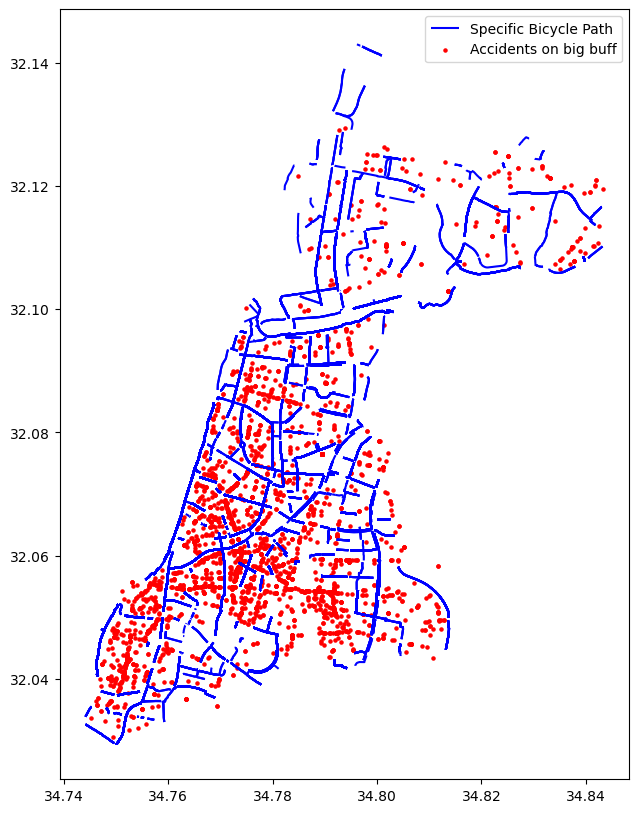

In [32]:
# ## Plotting Accidents for outside of buff

# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(10, 10))

# # BP
# # bicycle_paths_big_overlap.plot(ax=ax, color='blue', label='Specific Bicycle Path')
# accidents_gdf['poly_geo'].plot(ax=ax, color='blue', label='Specific Bicycle Path')
# accidents_gdf[accidents_gdf['distance'] > 60].plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

# # accidents_with_paths[accidents_with_paths.street_name.str.contains('טיילת', na=False)].plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )
# # accidents_with_paths[accidents_with_paths.accident_id == 2019046007].copy().plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )
# # Plot accidents
# # accidents_with_paths.plot(ax=ax, color='red', marker='o', label='Accidents on big buff', markersize=5 )

# # Plot the filtered accidents

# plt.legend()
# plt.show()